<a href="https://colab.research.google.com/github/ksailesh/housing_price_project/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read the Datasets

In [9]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive/')

df_enriched_features_file_path = '/content/drive/MyDrive/Colab Notebooks/df_enriched_features.pkl'
df_without_enriched_features_file_path = '/content/drive/MyDrive/Colab Notebooks/df_without_enriched_features.pkl'
try:
  df_enriched_features = pd.read_pickle(df_enriched_features_file_path)
  display(df_enriched_features.dtypes)
  df_without_enriched_features = pd.read_pickle(df_without_enriched_features_file_path)
  display(df_without_enriched_features.dtypes)
  print("Successfully loaded the pickle files.")
except FileNotFoundError:
  print(f"Error: File not found at {df_enriched_features_file_path}. Please check the file path.")
  print(f"Error: File not found at {df_without_enriched_features_file_path}. Please check the file path.")
except Exception as e:
  print(f"An error occurred: {e}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,0
longitude,float64
latitude,float64
housing_median_age,int64
total_rooms,int64
total_bedrooms,Int64
population,int64
households,int64
median_income,float64
median_house_value,int64
rooms_per_household,float64


,0
longitude,float64
latitude,float64
housing_median_age,int64
total_rooms,int64
total_bedrooms,Int64
population,int64
households,int64
median_income,float64
median_house_value,int64
ocean_proximity_INLAND,bool


Successfully loaded the pickle files.


# 1a. Random Forest Model

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df_enriched_features.drop('median_house_value', axis=1)
y = df_enriched_features['median_house_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust hyperparameters
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# 1b. Evaluate Model Performance


In [12]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")


Root Mean Squared Error (RMSE): 50410.54593823026
R2 Score: 0.8118039963396423


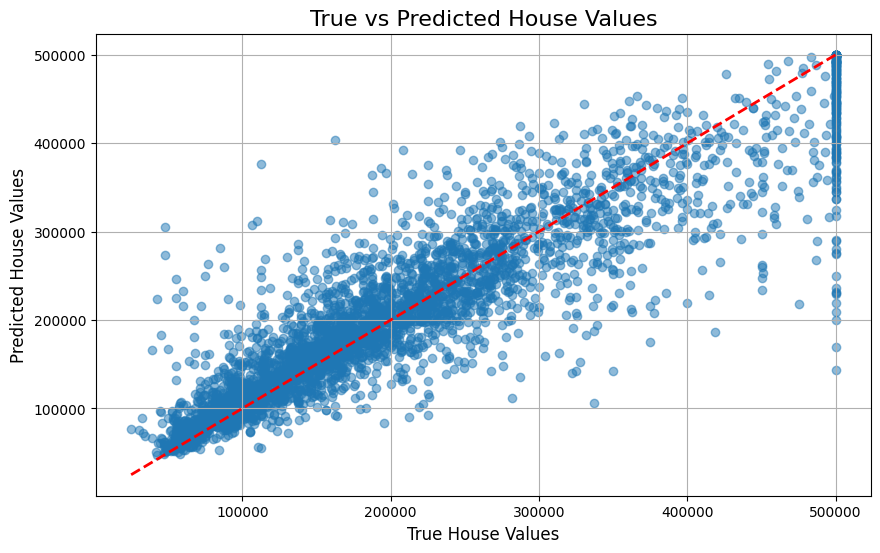

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("True vs Predicted House Values", fontsize=16)
plt.xlabel("True House Values", fontsize=12)
plt.ylabel("Predicted House Values", fontsize=12)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", lw=2)  # Y=x çizgisi
plt.grid(True)
plt.show()